In [157]:
# diabetes dataset for regression or classification: classify patients as having diabetes or not
# based on features such as patient age, sex, body mass index, average blood pressure, and six blood serum measurements 
# measured on 442 patients, and an indication of disease progression after one year

#https://blog.quantinsti.com/linear-regression-models-scikit-learn/
#https://scikit-learn.org/stable/datasets/index.html#diabetes-dataset
#https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/
#https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/


import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')
plt.rcdefaults()
%matplotlib inline
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
import pandas as pd
pd.set_option('display.max_rows', 1000)
pd.set_option('display.notebook_repr_html', True)

# DATAPROCESSING
In this block we are preparing the data for usage.

The dataset features has been mean-centered and scaled by the STD*N samples

In [158]:
x, y = load_diabetes(return_X_y=True)
diabetes = load_diabetes(as_frame=True)
feature_names = diabetes['feature_names']

DIABETES_VALUE = 200
PREDIABETES_VALUE = 115

print("DATA PREVIEW")
for i in range(0, 1):
  print(f"AGE:{x[i][0]}\nSEX: {x[i][1]}\nBMI: {x[i][2]}\nBP: {x[i][3]}\nTC: {x[i][4]}\nIDL: {x[i][5]}\nHDL: {x[i][6]}\nTCH: {x[i][7]}\nLTG: {x[i][8]}\nGLU: {x[i][9]}\n")

""" DIABETES CHART
               min   max   2hrs post meal
NORAML         70    99     <140
PRE-DIABETES   100   125    140-199
T2 DIABETES    >126         >200
"""

print("DATASET SHAPES")
print(f"X SHAPE: {x.shape}\nY SHAPE: {y.shape}\n")

xtrain_normal, xtest_normal, ytrain_normal, ytest_normal = train_test_split(x, y, test_size=0.2, random_state=42)

#CREATE LABELS
y_ = np.zeros(y.shape)
y_[y>=DIABETES_VALUE] = 1.
y_ = y_.astype(int)

xtrain_labeled, xtest_labeled, ytrain_labeled, ytest_labeled = train_test_split(x, y_, test_size=0.2, random_state=42, stratify=y_)

print(f"X Train SHAPE: {xtrain_normal.shape}\nY Train SHAPE: {ytrain_normal.shape}")

min_max_scaler = MinMaxScaler(feature_range = (0,1))
xtrain_standard_labeled = np.absolute(min_max_scaler.fit_transform(xtrain_labeled))
xtest_standard_labeled = np.absolute(min_max_scaler.fit_transform(xtest_labeled))


DATA PREVIEW
AGE:0.0380759064334241
SEX: 0.0506801187398187
BMI: 0.0616962065186885
BP: 0.0218723549949558
TC: -0.0442234984244464
IDL: -0.0348207628376986
HDL: -0.0434008456520269
TCH: -0.00259226199818282
LTG: 0.0199084208763183
GLU: -0.0176461251598052

DATASET SHAPES
X SHAPE: (442, 10)
Y SHAPE: (442,)

X Train SHAPE: (353, 10)
Y Train SHAPE: (353,)


# LINEAR REGRESSION
Here we'll see how BMI & GLucose relates to diabets progression 

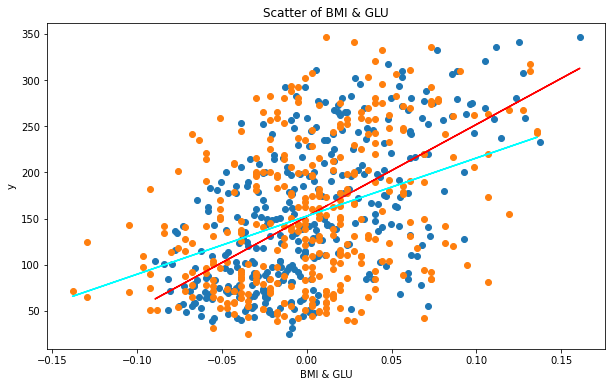

In [159]:
from sklearn.linear_model import LinearRegression

bmi = xtrain_normal[:, np.newaxis, 2]
glu = xtrain_normal[:, np.newaxis, 9]

y=ytrain_normal[:,np.newaxis]

bmi_linear_regression = LinearRegression().fit(bmi,ytrain_normal)
bmi_predicted_y = bmi_linear_regression.predict(bmi)

glu_linear_regression = LinearRegression().fit(glu,ytrain_normal)
glu_predicted_y = glu_linear_regression.predict(glu)

# plotting the regression line on the scatter plot
plt.figure(figsize=(10,6))
plt.scatter(bmi, ytrain_normal)
plt.scatter(glu, ytrain_normal)
plt.plot(bmi, bmi_predicted_y, c='r')
plt.plot(glu, glu_predicted_y, c='cyan')
plt.title('Scatter of BMI & GLU')
plt.ylabel("y")
plt.xlabel("BMI & GLU")
plt.show()



# HELPERS

In [160]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2, f_regression


# feature selection
def select_features(train_data, y_data, test_data, n_features = 'all', regression = True):
	score_function = f_regression
	if (regression):
		score_function = chi2

	kbest = SelectKBest(score_func=score_function, k=n_features)

	kbest.fit(train_data, y_data)

	x_train_kbest = kbest.transform(train_data)

	x_test_kbest = kbest.transform(test_data)

	return x_train_kbest, x_test_kbest, kbest

def plot_kbest_score(scores):
	# for i in range(len(scores)):
	# 	print('Feature %d: %f' % (i, scores[i]))
	plt.bar([i for i in range(len(scores))], scores)
	plt.title(f"Score value of each feature")
	plt.xlabel("Feature")
	plt.ylabel("Score")
	plt.show()

def pca_features(dataset, transform, n_features = 5):
	pca = PCA(n_components=n_features).fit(dataset)
	# APPLY PCA
	transformed = pca.transform(transform);
	return transformed, pca 

def plot_pca_variance(pca):	
	# GRAPH VARIANCE KEPT IN DATASET AGAINST X FEATURES
	plt.plot(np.cumsum(pca.explained_variance_ratio_))
	plt.title(f"PCA coverage features")
	plt.xlabel("Features")
	plt.ylabel("Coverage")
	plt.show()

def print_percent_correct(predicted, test):
  print('Percentage correct: ', 100*np.sum(predicted == test)/len(test))

def plot_matrix(title, matrix):
  cmap = ListedColormap(["darkorange", "gold", "blue", "red"])

  plt.figure()
  plt.matshow(matrix)
  for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
      plt.text(x=j, y=i, s=matrix[i,j], va='center', ha='center')

  plt.title(title)
  plt.xlabel("Predictied")
  plt.ylabel("Actual")
  plt.show()



# FEATURE SELECTION


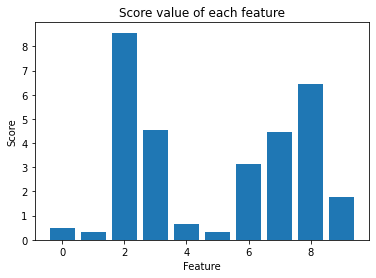

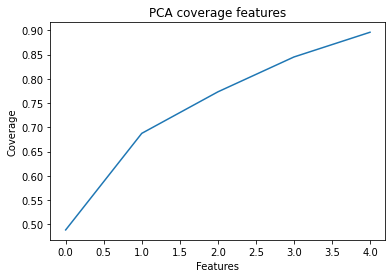

In [172]:
FEATURES = 5

# xtrain_standard_labeled
# xtrain_normal
x_trainset_features = xtrain_standard_labeled
y_trainset_features = ytrain_labeled
x_testset_features = xtest_standard_labeled

#find the most significant features from the inputs
x_train_kbest, x_test_kbest, kbest = select_features(x_trainset_features, y_trainset_features, x_testset_features, n_features=FEATURES)
plot_kbest_score(kbest.scores_)

transformed, pca = pca_features(dataset=x_trainset_features, transform=x_trainset_features, n_features=FEATURES)
x_train_pca = transformed
transformed, pca = pca_features(dataset=x_trainset_features, transform=x_testset_features, n_features=FEATURES)
x_test_pca = transformed
plot_pca_variance(pca)

# SET TRAIN TEST DATA HERE!!!!
x_train = x_train_kbest
x_test = x_test_kbest
y_train = ytrain_labeled
y_test = ytest_labeled


<Figure size 432x288 with 0 Axes>

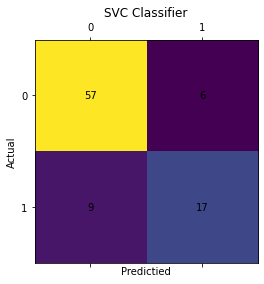

Percentage correct:  83.14606741573034


<Figure size 432x288 with 0 Axes>

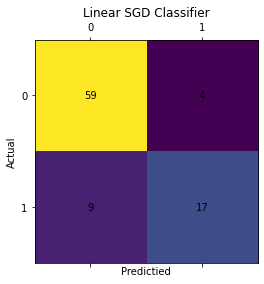

Percentage correct:  85.3932584269663


In [198]:

from sklearn.datasets import load_digits
from keras.models import Sequential, Model
from keras.layers import Input, Dense
from tensorflow.keras.utils import plot_model
from keras.optimizers import SGD
import pandas as pd
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap
from sklearn.linear_model import SGDClassifier



# CREATE ANN for predicting Diabetes
predicter = Sequential()
# PCA
# predicter.add(Dense(units=16, activation='relu', input_dim=FEATURES, name='Input', kernel_initializer='he_uniform'))
# predicter.add(Dense(units= 20, activation='relu', name='hidden'))
# predicter.add(Dense(units= 15, activation='relu', name='hidden2'))
# predicter.add(Dense(units= 1, activation='tanh',name='Output'))
# kbest
predicter.add(Dense(units=FEATURES*2, activation='relu', input_dim=FEATURES, name='Input'))
predicter.add(Dense(units= 10, activation='relu', name='hidden'))
predicter.add(Dense(units= 5, activation='relu', name='hidden2'))
predicter.add(Dense(units= 1, activation='sigmoid',name='Output'))
# - BINARY
# binary_crossentropy - 2 classes
# categorical_crossentropy - multiple classes
# hinge - -1 to 1
# squared_hinge
# - REGRESSION
# mean_squared_error
# mean_absolute_error
predicter.compile(optimizer='nadam', loss='binary_crossentropy', metrics=['accuracy'])

# CONFUSION MATRIX
svc_clf = SVC(random_state=42,kernel='rbf', C=2200, gamma=0.0001)
svc_clf.fit(x_train, y_train)
y_predSVC = svc_clf.predict(x_test)
svc_clf.get_params

cm = confusion_matrix(y_true=y_test, y_pred=y_predSVC)
plot_matrix("SVC Classifier", cm)
print_percent_correct(y_predSVC, y_test)

# Linear SDG classifier using SVM(Support vector machine)
sgd_clf = SGDClassifier(random_state=42, max_iter=2000, tol=0.001)
sgd_clf.fit(x_train, y_train)
y_predSDG = sgd_clf.predict(x_test)


# Confusion SGD
cm2 = confusion_matrix(y_true=y_test, y_pred=y_predSDG)
plot_matrix("Linear SGD Classifier", cm2)
print_percent_correct(y_predSDG, y_test)

# what are scores for the features


In [201]:
history = predicter.fit(x = x_train, y=y_train, epochs=100, batch_size=64, shuffle=True,\
                    validation_data=(x_test, y_test), verbose=1)

Epoch 1/100
6/6 [==============================] - 0s 9ms/step - loss: 0.7131 - accuracy: 0.2861 - val_loss: 0.7088 - val_accuracy: 0.2921
Epoch 2/100
6/6 [==============================] - 0s 4ms/step - loss: 0.7060 - accuracy: 0.2861 - val_loss: 0.7014 - val_accuracy: 0.3034
Epoch 3/100
6/6 [==============================] - 0s 4ms/step - loss: 0.6991 - accuracy: 0.3229 - val_loss: 0.6947 - val_accuracy: 0.3820
Epoch 4/100
6/6 [==============================] - 0s 5ms/step - loss: 0.6927 - accuracy: 0.4873 - val_loss: 0.6888 - val_accuracy: 0.5730
Epoch 5/100
6/6 [==============================] - 0s 5ms/step - loss: 0.6868 - accuracy: 0.6431 - val_loss: 0.6829 - val_accuracy: 0.7303
Epoch 6/100
6/6 [==============================] - 0s 4ms/step - loss: 0.6811 - accuracy: 0.7167 - val_loss: 0.6771 - val_accuracy: 0.7753
Epoch 7/100
6/6 [==============================] - 0s 5ms/step - loss: 0.6753 - accuracy: 0.7564 - val_loss: 0.6712 - val_accuracy: 0.7416
Epoch 8/100
6/6 [==========

[0.87330335 0.08965543 0.52233464 0.177753   0.01327008 0.8821111
 0.16274625 0.09948927 0.034823   0.15205273 0.07780564 0.03610292
 0.60214216 0.4474443  0.10056335 0.5492716  0.07020876 0.13431585
 0.17516708 0.4647277  0.20075145 0.00754145 0.11196023 0.26947796
 0.18321842 0.7464182  0.33716297 0.30062038 0.4508667  0.48688638
 0.22792453 0.88259387 0.08105305 0.00171492 0.48922125 0.09352148
 0.3351586  0.5259844  0.10273623 0.33822286 0.52437466 0.16004589
 0.0142791  0.6009427  0.5052956  0.47080672 0.64746606 0.5778585
 0.03117028 0.09072629 0.08098167 0.6940567  0.6048448  0.01095247
 0.3156337  0.19476679 0.9157909  0.46139932 0.52927756 0.05266681
 0.14654571 0.62698376 0.5796641  0.27136785 0.0146991  0.7744789
 0.2087383  0.01714364 0.09680921 0.09942314 0.06588674 0.3522908
 0.38648704 0.06659964 0.76627576 0.01684389 0.80914366 0.6889051
 0.05159026 0.89391243 0.453142   0.76263475 0.04440501 0.02029669
 0.00752917 0.04993978 0.00892726 0.02694944 0.01835719]
[1. 0. 1. 

<Figure size 432x288 with 0 Axes>

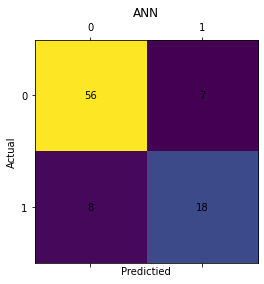

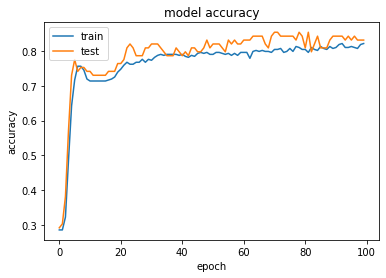

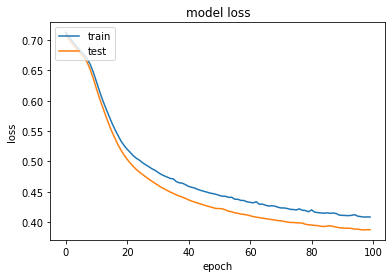

In [202]:
from sklearn.metrics import confusion_matrix, classification_report

pr = predicter.predict(x_test)
pr_reformed = pr[:,0]
print(pr_reformed)
pr_transformed = np.zeros(len(pr))
pr_transformed[pr_reformed>0.5] = 1
print(pr_transformed)

ann_cm = confusion_matrix(y_true=y_test, y_pred=pr_transformed)
plot_matrix("ANN", ann_cm)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



accuracy:  0.8202247191011236


<Figure size 432x288 with 0 Axes>

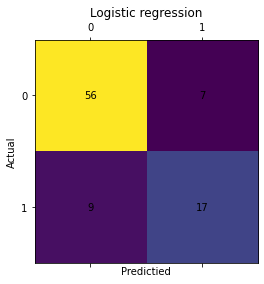

In [165]:
# build a model to classify patients
#(1) logistic regression classifier

model = LogisticRegression(penalty = 'l2', random_state = 0)
model.fit(x_train, y_train)

#testing the classifier
ypred = model.predict(x_test)
print('accuracy: ',accuracy_score(y_test, ypred))

cm = confusion_matrix(y_test, ypred)
plot_matrix("Logistic regression", cm)


0.2808988764044944


<Figure size 432x288 with 0 Axes>

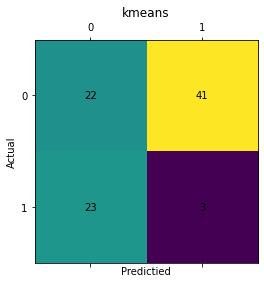

In [213]:
from sklearn.cluster import KMeans
#Create KMC Classifier
kmeans = KMeans(n_clusters=2, max_iter=100, algorithm = '', random_state=42, verbose=0)
kmeans.fit(x_train)
kmeans_predicted = kmeans.predict(x_test)
print(metrics.accuracy_score(y_test, kmeans_predicted))
kmeans_cm = confusion_matrix(y_true=y_test, y_pred=kmeans_predicted)
plot_matrix("kmeans", kmeans_cm)